<a href="https://www.kaggle.com/code/alisonmachadoluiz/amazon-top-50-books-analysis?scriptVersionId=111285881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I just found this dataset and found it interesting to do some tests with, so there are no instructions or clear points in those analysis that I did here.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (2).csv
/kaggle/input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv


In [2]:
topbooks = pd.read_csv('../input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv')
print('Ready')

Ready


In [3]:
topbooks.describe()

,User Rating,Year
count,650.000000,650.000000
mean,4.635385,2015.000000
std,0.221517,3.744539
min,3.300000,2009.000000
25%,4.500000,2012.000000
50%,4.700000,2015.000000
75%,4.800000,2018.000000
max,4.900000,2021.000000


In [4]:
topbooks.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [5]:
topbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [6]:
topbooks.Author.unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Barack Obama', 'Jaycee Dugard', "Madeleine L'Engle",
       'Steve Harvey', 'Adult Coloring Book Designs',
       'Blue Star Coloring', 'Coloring Books for Adults', 'Ron Chernow',
       'Anthony Doerr', 'Veronica Roth', 'Jeanine Cummins',
       'Mark R. Levin', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Brené Brown', 'James Clear', 'Mark Twain',
       'DK', 'Angie Grace', 'Ina Garten', 'Michelle Obama',
       'Atul Gawande', 'Ta-Nehisi Coates', 'Jeff Kinney',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Sharon Jones', 'Amanda Gorman', "Sasha O'Hara", 'David Goggins',
       'Thomas Piketty', 'Isabel Wilkerson', 'Suzanne Collins',
       'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan', 'Marjorie Sarnat',
    

In [7]:
topbooks.Author.value_counts().head(10)

Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
Dr. Seuss                             10
Dav Pilkey                             9
Eric Carle                             9
Gallup                                 9
Stephenie Meyer                        8
Name: Author, dtype: int64

In [8]:
topbooks['Reviews'] = topbooks['Reviews'].str.replace(",","")
topbooks['Reviews'] = pd.to_numeric(topbooks['Reviews']).astype(int)
topbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    int64  
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 40.8+ KB


In [9]:
rr = topbooks.loc[topbooks['Author']== 'Rick Riordan'].sort_values('Reviews', ascending=False)
rr

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
482,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,$14.00,$14,2013,Fiction
410,The Blood of Olympus (The Heroes of Olympus (5)),Rick Riordan,4.8,6600,$11.00,$11,2014,Fiction
509,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,$10.00,$10,2012,Fiction
494,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,$7.00,$7,2009,Fiction
495,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,$7.00,$7,2010,Fiction
505,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,$14.00,$14,2010,Fiction
545,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,$10.00,$10,2011,Fiction
535,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,$12.00,$12,2010,Fiction
538,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,$12.00,$12,2012,Fiction
555,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,$10.00,$10,2011,Fiction


<Figure size 1080x720 with 0 Axes>

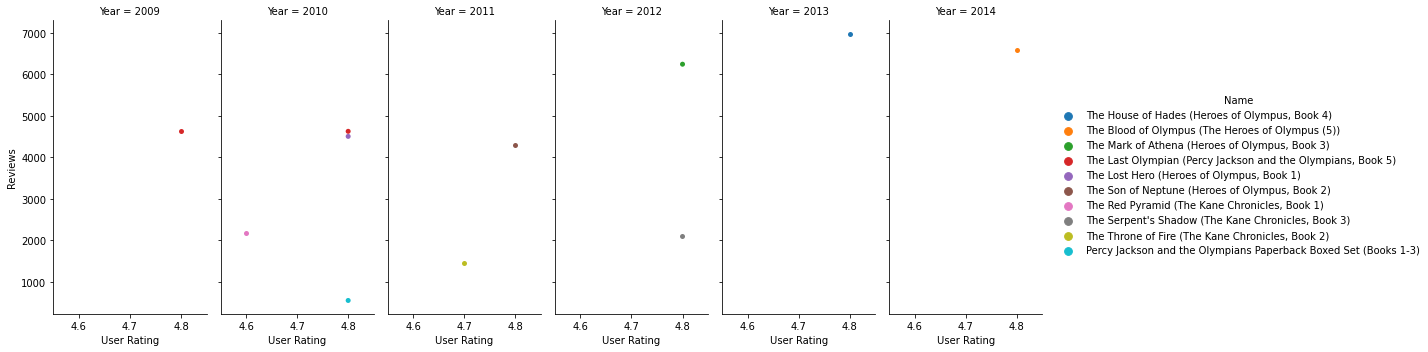

In [10]:
plt.figure(figsize=(15,10))
sns.catplot(
    data=rr, kind="swarm",
    x="User Rating", y="Reviews", hue="Name", col="Year",
    aspect=.5
)

In [11]:
bestbooks= topbooks.loc[topbooks['User Rating']==4.9].sort_values('Reviews', ascending=False)
bestbooks

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
13,A Promised Land,Barack Obama,4.9,83212,$23.00,$23,2020,Non Fiction
214,I Love You to the Moon and Back,Amelia Hepworth,4.9,58200,$4.31,$5,2021,Fiction
420,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.9,53549,$15.00,$15,2020,Non Fiction
571,The Very Hungry Caterpillar,Eric Carle,4.9,52375,$5.06,$6,2021,Non Fiction
52,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,45919,$5.36,$6,2021,Fiction
...,...,...,...,...,...,...,...,...
347,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,$12.00,$12,2014,Fiction
293,Obama: An Intimate Portrait,Pete Souza,4.9,3192,$22.00,$22,2017,Non Fiction
184,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,$30.00,$30,2017,Fiction
208,Humans of New York : Stories,Brandon Stanton,4.9,2812,$17.00,$17,2015,Non Fiction


<Figure size 1080x720 with 0 Axes>

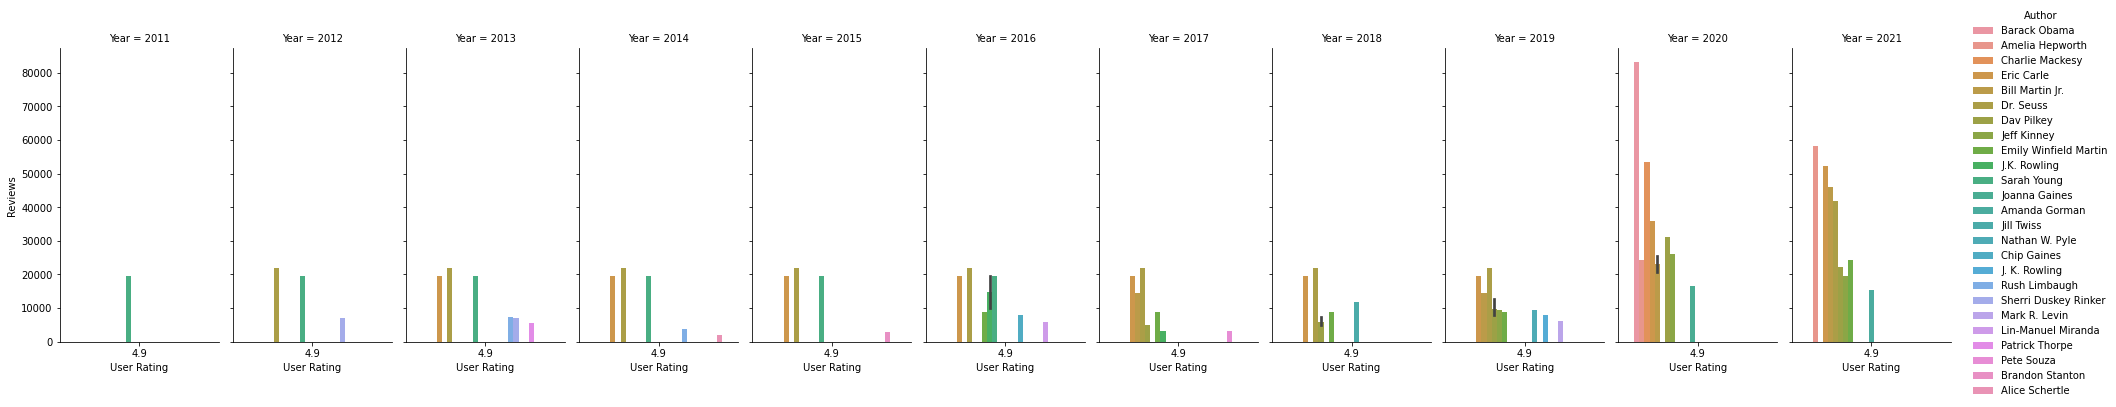

In [12]:
plt.figure(figsize=(15,10))
sns.catplot(
    data=bestbooks, kind="bar",
    x="User Rating", y="Reviews", hue="Author", col="Year",
    aspect=.5
)

<Figure size 1080x720 with 0 Axes>

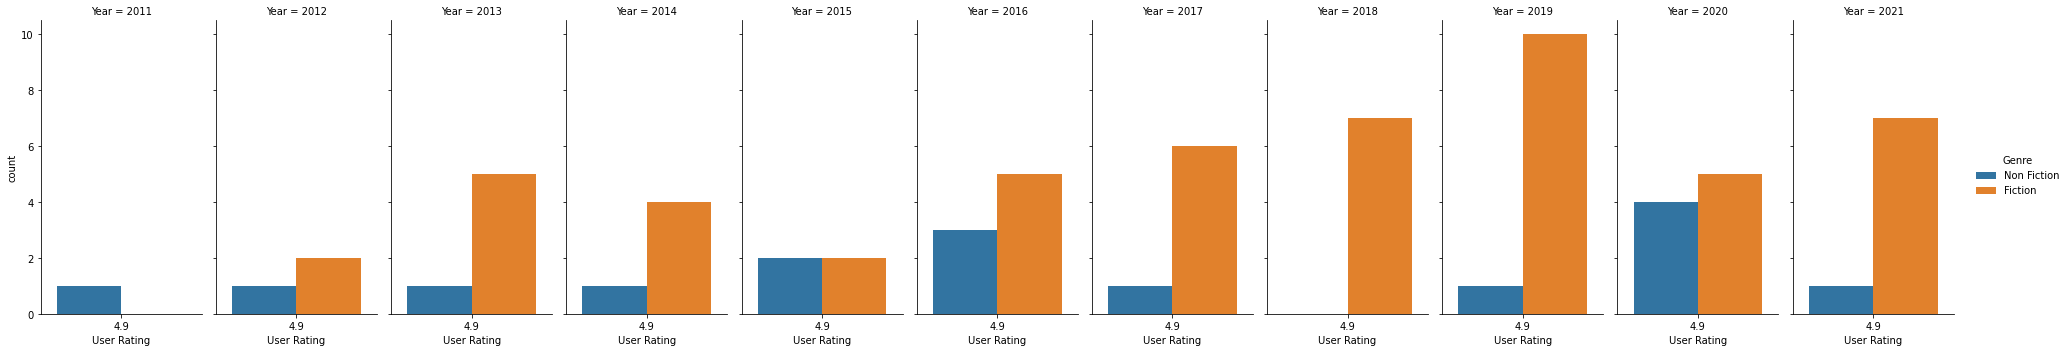

In [13]:
plt.figure(figsize=(15,10))
sns.catplot(
    data=bestbooks, kind="count",
    x="User Rating", hue="Genre", col="Year",
    aspect=.5)